https://arxiv.org/pdf/1610.05708

$$f(x) = \frac{1}{4}\|Ex\|_2^2+\frac{1}{4}\|Ax-b\|_4^4 + \frac{1}{2}\|Cx-d\|_2^2$$

is relatively smooth and strongly convex with 

$$h(x) = \frac{1}{4}\|x\|_2^4+\frac{1}{2}\|x\|_2^2$$

Is 

$$f_1(x,y) = f(x)-f(y)+x^\top By$$

relative strongly monotone  

$$h_1(x,y) = h(x)-h(y)?$$

Then $$\nabla^2 f(x) = \|Ex\|_2^2E^\top E+2E^\top E xx^\top E^\top E+3A^\top D(x)^2 A+C^\top C;D(x) = Diag(Ax-b)$$

we have $$L \nabla^2 h(x) \succeq \nabla^2 f(x) \succeq 
\mu \nabla^2 h(x)$$

Thus we also have,

$$ -L \nabla^2 h(y) \preceq -\nabla^2 f(y) \preceq -\mu \nabla^2 h(y)$$

Now we have,


$$ \frac{\nabla F(x,y)+\nabla F(x,y)^\top}{2} = \begin{bmatrix} \nabla^2 f(x) & 0\\ 0 & -\nabla^2f(y)\end{bmatrix}$$

$$ \frac{\nabla H(x,y)+\nabla H(x,y)^\top}{2} = \begin{bmatrix} \nabla^2 h(x) & 0\\ 0 & -\nabla^2h(y)\end{bmatrix}$$

where $$F(x,y) = (\nabla f(x),-\nabla f(y))~and~H(x,y) = (\nabla h(x),-\nabla h(y)).$$

$$ \frac{\nabla F(x,y)+\nabla F(x,y)^\top}{2} - \mu\frac{\nabla H(x,y)+\nabla H(x,y)^\top}{2} = \begin{bmatrix} \nabla^2 f(x)-\mu\nabla^2 h(y) & 0\\ 0 & \mu\nabla^2 h(y)-\nabla^2f(y)\end{bmatrix}$$

since diagonal blocks are PSD and NSD we have that $F$ is $\mu$-strongly monotone with respect to $H$. 

Similarly we find that $F$ is $L$ relatively smooth with respect to $H$. By observation a bilinear term $x^\top A y$ can also be added.

$$z_{k+\frac{1}{2}} = z' \ \textrm{s.t.,}\ $$
        $$\langle{F(z_k)+L(H(z')-H(z_k)),z'-z\rangle}\leq 0~ \forall z$$ 
        $$z_{k+1} = z' \ \textrm{s.t.,}\ $$
        $$\langle F(z_{k+\frac{1}{2}})+L(H(z')-H(z_k))+m(H(z')-H(z_{k+\frac{1}{2}})),z'-z \rangle\leq 0~ \forall z$$  


We have, $$H(x,y) = ((\|x\|^2x+x),-(\|y\|^2y+y)) $$ and $$F(x,y) = ((\|Ex\|^2E^\top Ex+A^\top[(Ax-b)_i^3]_{i=1}^n)+(Cx-d)+By,-(\|Ey\|^2E^\top Ey+A^\top[(Ay-b)_i^3]_{i=1}^n)+(Cy-d)+B^\top x)$$.

First do mirror prox on : $$F(z_k)+L(H(z')-H(z_k)) = O_k(z')$$ output $$z_{k+\frac{1}{2}}$$ and do mirror prox on,

$$F(z_{k+\frac{1}{2}})+L(H(z')-H(z_k))+m(H(z')-H(z_{k+\frac{1}{2}})) = O_{k+\frac{1}{2}}(z')$$

/var/folders/49/567b8wxj313623dgh_lpvfg40000gn/T/ipykernel_41825/967918805.py:78: RuntimeWarning: overflow encountered in multiply
  gy = -np.linalg.norm(y)**2 * y - y
/var/folders/49/567b8wxj313623dgh_lpvfg40000gn/T/ipykernel_41825/967918805.py:77: RuntimeWarning: overflow encountered in multiply
  gx = np.linalg.norm(x)**2 * x + x
/var/folders/49/567b8wxj313623dgh_lpvfg40000gn/T/ipykernel_41825/967918805.py:35: RuntimeWarning: invalid value encountered in subtract
  z_0 = z_half - oracleOk(z_half, z_k) / L


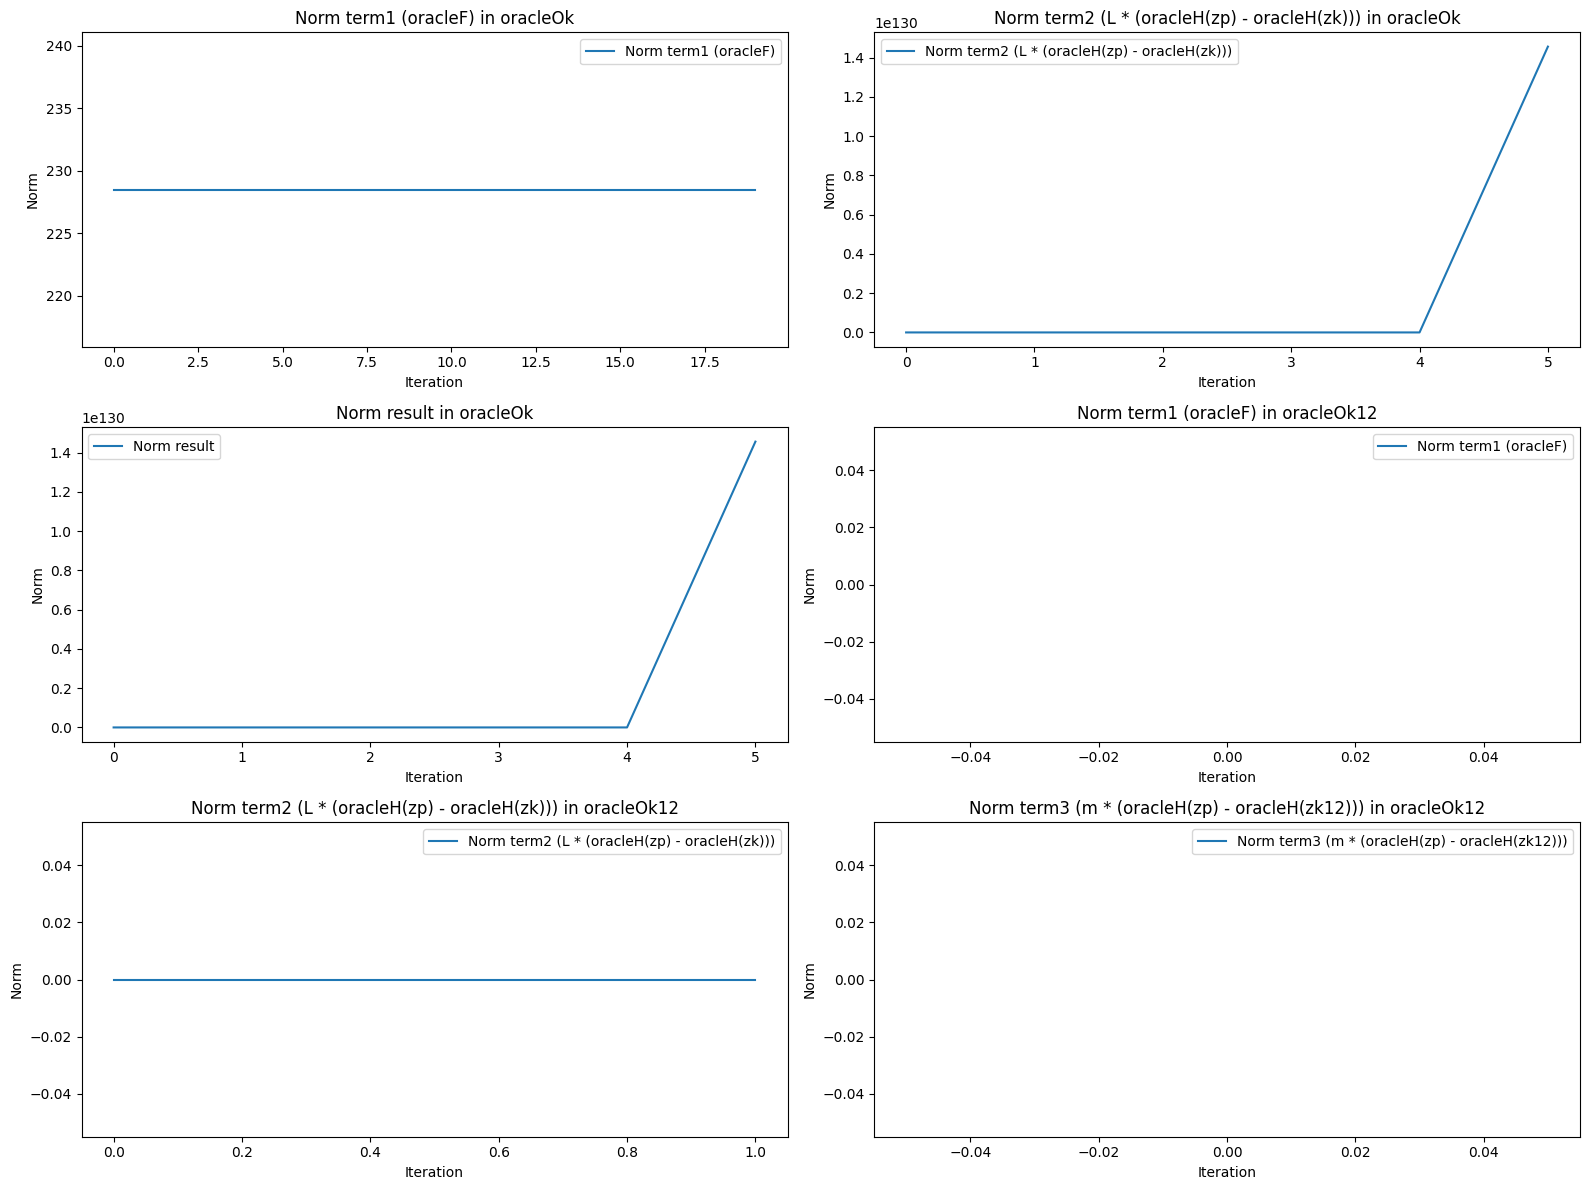

In [5]:
import numpy as np
import matplotlib.pyplot as plt

matrixSize = 3
L = 100
m = 0.1
num_iterations = 10

E = np.random.rand(matrixSize, matrixSize)
E = np.dot(E, E.transpose())

C = np.random.rand(matrixSize, matrixSize)
C = np.dot(C, C.transpose())

B = np.random.rand(matrixSize, matrixSize)

A = np.random.rand(matrixSize, matrixSize)
b = np.random.rand(matrixSize, 1)
d = np.random.rand(matrixSize, 1)
z = np.random.rand(2 * matrixSize, 1)

# Lists to store norms of components over iterations
oracleOk_norms = []
oracleOk12_norms = []

def mirrorfreeMP(z_0, z_00):
    for i in range(num_iterations):
        z_12 = MP1(z_00, z_0)
        z_00 = MP2(z_00, z_12, z_0)
    return z_00

def MP1(z_k, z_0):
    for i in range(num_iterations):
        z_half = z_0 - oracleOk(z_0, z_k) / L
        z_0 = z_half - oracleOk(z_half, z_k) / L
    return z_0

def MP2(z_k, z_half, z_0):
    for i in range(num_iterations):
        z_half = z_0 - oracleOk12(z_0, z_half, z_k) / L
        z_0 = z_half - oracleOk12(z_0, z_half, z_k) / L
    return z_0

def oracleOk(zp, zk):
    term1 = oracleF(zk)
    term2 = L * (oracleH(zp) - oracleH(zk))
    ok = term1 + term2
    norm_term1 = np.linalg.norm(term1)
    norm_term2 = np.linalg.norm(term2)
    norm_ok = np.linalg.norm(ok)
    oracleOk_norms.append((norm_term1, norm_term2, norm_ok))
    return ok

def oracleOk12(zp, zk12, zk):
    term1 = oracleF(zk12)
    term2 = L * (oracleH(zp) - oracleH(zk))
    term3 = m * (oracleH(zp) - oracleH(zk12))
    ok12 = term1 + term2 + term3
    norm_term1 = np.linalg.norm(term1)
    norm_term2 = np.linalg.norm(term2)
    norm_term3 = np.linalg.norm(term3)
    norm_ok12 = np.linalg.norm(ok12)
    oracleOk12_norms.append((norm_term1, norm_term2, norm_term3, norm_ok12))
    return ok12

def oracleF(z):
    (x, y) = (z[:matrixSize], z[matrixSize:])
    gx = (np.linalg.norm(np.dot(E, x))**2 * np.dot(E, np.dot(E, x)) +
          np.dot(A, (np.dot(A, x) - b)**3) + np.dot(C, x) - d) + np.dot(B, y)
    gy = (-(np.linalg.norm(np.dot(E, y))**2 * np.dot(E, np.dot(E, y)) +
            np.dot(A, (np.dot(A, y) - b)**3) + np.dot(C, y) - d) + np.dot(B.T, x))
    result = np.concatenate([gx, gy])
    return result

def oracleH(z):
    (x, y) = (z[:matrixSize], z[matrixSize:])
    gx = np.linalg.norm(x)**2 * x + x
    gy = -np.linalg.norm(y)**2 * y - y
    result = np.concatenate([gx, gy])
    return result

# Initial run with debug
mirrorfreeMP(z, z)

# Extract norms for plotting
norm_term1_ok, norm_term2_ok, norm_result_ok = zip(*oracleOk_norms)
norm_term1_ok12, norm_term2_ok12, norm_term3_ok12, norm_result_ok12 = zip(*oracleOk12_norms)

# Plotting the norms of components
plt.figure(figsize=(16, 12))

plt.subplot(3, 2, 1)
plt.plot(norm_term1_ok, label='Norm term1 (oracleF)')
plt.title('Norm term1 (oracleF) in oracleOk')
plt.xlabel('Iteration')
plt.ylabel('Norm')
plt.legend()

plt.subplot(3, 2, 2)
plt.plot(norm_term2_ok, label='Norm term2 (L * (oracleH(zp) - oracleH(zk)))')
plt.title('Norm term2 (L * (oracleH(zp) - oracleH(zk))) in oracleOk')
plt.xlabel('Iteration')
plt.ylabel('Norm')
plt.legend()

plt.subplot(3, 2, 3)
plt.plot(norm_result_ok, label='Norm result')
plt.title('Norm result in oracleOk')
plt.xlabel('Iteration')
plt.ylabel('Norm')
plt.legend()

plt.subplot(3, 2, 4)
plt.plot(norm_term1_ok12, label='Norm term1 (oracleF)')
plt.title('Norm term1 (oracleF) in oracleOk12')
plt.xlabel('Iteration')
plt.ylabel('Norm')
plt.legend()

plt.subplot(3, 2, 5)
plt.plot(norm_term2_ok12, label='Norm term2 (L * (oracleH(zp) - oracleH(zk)))')
plt.title('Norm term2 (L * (oracleH(zp) - oracleH(zk))) in oracleOk12')
plt.xlabel('Iteration')
plt.ylabel('Norm')
plt.legend()

plt.subplot(3, 2, 6)
plt.plot(norm_term3_ok12, label='Norm term3 (m * (oracleH(zp) - oracleH(zk12)))')
plt.title('Norm term3 (m * (oracleH(zp) - oracleH(zk12))) in oracleOk12')
plt.xlabel('Iteration')
plt.ylabel('Norm')
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
mirrorfreeMP(np.zeros((2*matrixSize,1)),np.zeros((2*matrixSize,1)))

/var/folders/49/567b8wxj313623dgh_lpvfg40000gn/T/ipykernel_41825/967918805.py:58: RuntimeWarning: invalid value encountered in add
  ok12 = term1 + term2 + term3


array([[nan],
       [nan],
       [nan],
       [nan],
       [nan],
       [nan]])